### Group by  결과는 Dictionary 형태

In [1]:
import pandas as pd

In [2]:
# source: data.ex.co.kr :데이터조회>교통>영업소별이용차량
# thousands 를 지정하지 않으면 , 00~23시 데이터가 object로  인식됨.

df_ex = pd.read_csv('../../data/ex/ex_tol_202003_04.csv'
                 , encoding='cp949'
                 , thousands=',')
df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 27 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   날짜      127 non-null    object
 1   영업소     127 non-null    object
 2   자료종류    127 non-null    object
 3   00시     127 non-null    int64 
 4   01시     127 non-null    int64 
 5   02시     127 non-null    int64 
 6   03시     127 non-null    int64 
 7   04시     127 non-null    int64 
 8   05시     127 non-null    int64 
 9   06시     127 non-null    int64 
 10  07시     127 non-null    int64 
 11  08시     127 non-null    int64 
 12  09시     127 non-null    int64 
 13  10시     127 non-null    int64 
 14  11시     127 non-null    int64 
 15  12시     127 non-null    int64 
 16  13시     127 non-null    int64 
 17  14시     127 non-null    int64 
 18  15시     127 non-null    int64 
 19  16시     127 non-null    int64 
 20  17시     127 non-null    int64 
 21  18시     127 non-null    int64 
 22  19시     127 non-null    in

In [3]:
df_ex.head()

,날짜,영업소,자료종류,00시,01시,02시,03시,04시,05시,06시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020.03.20,서울,입구,1455,1003,683,715,1015,3436,5861,...,5133,5278,5476,5772,6091,4922,4644,4647,3621,2562
1,2020.03.20,동서울,입구,448,359,324,356,656,2016,3873,...,3907,4287,3992,3679,4060,3266,2793,2040,1355,854
2,2020.03.20,서서울,입구,810,582,463,542,1107,3757,6539,...,5549,5264,5550,5274,5352,5039,4331,3377,2378,1582
3,2020.03.20,군자,입구,406,329,234,256,575,1674,2620,...,2866,2912,3017,2934,2845,2260,1856,1451,1059,765
4,2020.03.21,서울,입구,1975,1299,1043,893,1262,3152,5151,...,5461,5771,5428,5401,4414,3801,3694,3471,3095,1964


# 하나의 컬럼에  적용
'00시' 컬럼에 대한 통과 건수(한달동안의 합계를 구하기)

1. 특정컬럼 지정 후 합계
2. 연산가능한 컬럼을 모두 전달후 연산대상 컬럼 지정하여 합계

In [4]:
# 특정컬럼 지정 후 합계
df_ex['00시'].groupby(df_ex['영업소']).sum()

영업소
군자     14172
동서울    15482
서서울    29619
서울     50097
Name: 00시, dtype: int64

In [5]:
# 연산가능한 컬럼을 모두 전달후 연산대상 컬럼 지정하여 합계
df_ex.groupby(df_ex['영업소']).sum()

,00시,01시,02시,03시,04시,05시,06시,07시,08시,09시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
영업소,,,,,,,,,,,,,,,,,,,,,
군자,14172,10785,8839,9160,18454,50605,75360,90782,91317,87339,...,86543,87180,90028,90907,79616,62905,52160,43070,31346,21036
동서울,15482,11176,9745,11506,23942,72195,126334,146221,145077,146857,...,121986,120692,113830,106098,91219,71733,61951,51324,35911,23609
서서울,29619,20449,16801,19316,38360,116496,182866,187792,191177,182634,...,154718,152150,151031,151298,143150,123485,107040,90324,68053,45344
서울,50097,34053,24989,24190,39326,116194,191764,183650,165827,171773,...,170775,170208,169209,175739,175073,153068,136883,130354,104748,72224


In [6]:
# 연산가능한 컬럼을 모두 전달후 연산대상 컬럼 지정하여 합계
df_ex.groupby(df_ex['영업소']).sum()['00시']

영업소
군자     14172
동서울    15482
서서울    29619
서울     50097
Name: 00시, dtype: int64

In [7]:
# 연산가능한 컬럼을 모두 전달후 연산대상 컬럼 지정하여 합계
df_ex.groupby(df_ex['영업소'])['00시'].sum()

영업소
군자     14172
동서울    15482
서서울    29619
서울     50097
Name: 00시, dtype: int64

# 여러 함수 적용(.agg)
'00시' 컬럼에 대한 통과 건수(한달동안의 합계를 구하기) 및 평균 구하기


In [8]:
df_ex.iloc[:, [3,10]].groupby(df_ex['영업소']).agg(['sum','mean'])

00시                  07시             
       sum         mean     sum         mean
영업소                                         
군자   14172   442.875000   90782  2836.937500
동서울  15482   483.812500  146221  4569.406250
서서울  29619   955.451613  187792  6057.806452
서울   50097  1565.531250  183650  5739.062500

In [9]:
data = df_ex.iloc[:,[3,10]].groupby(df_ex['영업소']).agg(['sum','mean'])

In [10]:
data.describe()

00시                         07시             
                sum         mean            sum         mean
count      4.000000     4.000000       4.000000     4.000000
mean   27342.500000   861.917591  152111.250000  4800.803175
std    16704.123772   523.571373   44958.427548  1457.246344
min    14172.000000   442.875000   90782.000000  2836.937500
25%    15154.500000   473.578125  132361.250000  4136.289062
50%    22550.500000   719.632056  164935.500000  5154.234375
75%    34738.500000  1107.971522  184685.500000  5818.748488
max    50097.000000  1565.531250  187792.000000  6057.806452

# 지정 그룹으로 행 또는 열 묶기

# 2. 데이터분석

### 2.1 영업소 요일별 /시간대별 차량 통과 건수

In [13]:
df_ex

,날짜,영업소,자료종류,00시,01시,02시,03시,04시,05시,06시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020.03.20,서울,입구,1455,1003,683,715,1015,3436,5861,...,5133,5278,5476,5772,6091,4922,4644,4647,3621,2562
1,2020.03.20,동서울,입구,448,359,324,356,656,2016,3873,...,3907,4287,3992,3679,4060,3266,2793,2040,1355,854
2,2020.03.20,서서울,입구,810,582,463,542,1107,3757,6539,...,5549,5264,5550,5274,5352,5039,4331,3377,2378,1582
3,2020.03.20,군자,입구,406,329,234,256,575,1674,2620,...,2866,2912,3017,2934,2845,2260,1856,1451,1059,765
4,2020.03.21,서울,입구,1975,1299,1043,893,1262,3152,5151,...,5461,5771,5428,5401,4414,3801,3694,3471,3095,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020.04.19,서서울,입구,1098,796,611,561,798,2073,2862,...,4574,4568,4574,4324,3810,3679,4114,3944,2823,1764
123,2020.04.19,군자,입구,530,379,278,212,318,697,958,...,2355,2646,2723,2260,1965,1737,1667,1522,1008,632
124,2020.04.20,서울,입구,1435,936,686,831,2003,5742,7951,...,5298,4951,5062,5719,6206,4923,4571,3844,2890,2164
125,2020.04.20,동서울,입구,461,344,301,495,1198,3515,5215,...,3707,3721,3549,3019,2567,1884,1592,1356,970,681


In [44]:
import datetime
import matplotlib.

day_nm = ['월','화','수','목','금','토','일']

df_ex.loc[:,'날짜'] = pd.to_datetime(df_ex.loc[:,'날짜'])

df_ex['요일'] = df_ex['날짜'].dt.weekday.apply(lambda x: day_nm[x])

df_ex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   날짜      127 non-null    datetime64[ns]
 1   영업소     127 non-null    object        
 2   자료종류    127 non-null    object        
 3   00시     127 non-null    int64         
 4   01시     127 non-null    int64         
 5   02시     127 non-null    int64         
 6   03시     127 non-null    int64         
 7   04시     127 non-null    int64         
 8   05시     127 non-null    int64         
 9   06시     127 non-null    int64         
 10  07시     127 non-null    int64         
 11  08시     127 non-null    int64         
 12  09시     127 non-null    int64         
 13  10시     127 non-null    int64         
 14  11시     127 non-null    int64         
 15  12시     127 non-null    int64         
 16  13시     127 non-null    int64         
 17  14시     127 non-null    int64         
 18  15시     12

In [102]:
fig_data = df_ex
# 필요없는 항목(컬럼) 삭제
fig_data = fig_data.drop(['날짜','자료종류'], axis = 'columns')
fig_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127 entries, 0 to 126
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   영업소     127 non-null    object
 1   00시     127 non-null    int64 
 2   01시     127 non-null    int64 
 3   02시     127 non-null    int64 
 4   03시     127 non-null    int64 
 5   04시     127 non-null    int64 
 6   05시     127 non-null    int64 
 7   06시     127 non-null    int64 
 8   07시     127 non-null    int64 
 9   08시     127 non-null    int64 
 10  09시     127 non-null    int64 
 11  10시     127 non-null    int64 
 12  11시     127 non-null    int64 
 13  12시     127 non-null    int64 
 14  13시     127 non-null    int64 
 15  14시     127 non-null    int64 
 16  15시     127 non-null    int64 
 17  16시     127 non-null    int64 
 18  17시     127 non-null    int64 
 19  18시     127 non-null    int64 
 20  19시     127 non-null    int64 
 21  20시     127 non-null    int64 
 22  21시     127 non-null    in

In [104]:
# 영업소/요일별 각시간대 합계
fig_data = fig_data.groupby([fig_data['영업소'],df_ex['요일']]).sum()

KeyError: '영업소'

In [85]:
#fig_data = fig_data.set_index(['영업소','요일'])
fig_data.columns.names=['시간']
fig_data

시간       00시   01시   02시   03시   04시    05시    06시    07시    08시    09시  ...  \
영업소 요일                                                                   ...   
군자  금   2118  1664  1331  1360  2827   7496  12881  17389  15896  15316  ...   
    목   1664  1262  1078  1134  2460   7540  11559  14058  14364  12002  ...   
    수   1751  1349  1116  1183  2182   6512   9999  12209  12947  11494  ...   
    월   2031  1476  1338  1616  4430  11787  15887  18805  17221  16080  ...   
    일   2384  1652  1256  1062  1482   3292   4647   5193   6124   7981  ...   
    토   2674  2072  1679  1611  2692   6797   9033   9015  10241  12331  ...   
    화   1550  1310  1041  1194  2381   7181  11354  14113  14524  12135  ...   
동서울 금   2341  1806  1585  1747  3433   9764  19140  24271  23921  22576  ...   
    목   1848  1346  1251  1419  3050   9504  17157  20943  21095  19241  ...   
    수   2026  1472  1282  1486  2869   8567  15783  19051  18849  18972  ...   
    월   2437  1703  1570  2279  5593  16707  25414  28270  26451  24376  ...   
    일   1970  1382  1016  1014  2053   6870  12036  11538  12521  16731  ...   
    토   2971  2089  1761  2020  3969  11944  20142  21041  21514  25395  ...   
    화   1889  1378  1280  1541  2975   8839  16662  21107  20726  19566  ...   
서서울 금   4375  2964  2482  2855  5394  17625  32387  35221  34924  31373  ...   
    목   3443  2415  1891  2360  4929  17045  27902  29529  28709  25381  ...   
    수   3510  2588  2221  2399  4513  14327  24805  26515  26666  24976  ...   
    월   4037  2528  2072  3034  8708  24432  30213  25789  26975  25203  ...   
    일   4856  3369  2594  2462  3636   9357  13827  14642  15981  20175  ...   
    토   6015  4290  3440  3735  6442  17597  25992  27250  29110  29887  ...   
    화   3383  2295  2101  2471  4738  16113  27740  28846  28812  25639  ...   
서울  금   7651  5313  3829  3589  5372  16198  29071  30393  28428  27628  ...   
    목   5921  4045  2870  2985  4843  15714  26375  27195  23113  22757  ...   
    수   6418  4560  3266  3013  4466  13339  24403  23777  21826  22156  ...   
    월   7280  4728  3413  4197  9776  27425  38880  31994  26780  26811  ...   
    일   7149  4721  3371  2707  3626  11045  18541  17049  16996  21589  ...   
    토   9922  6797  5163  4620  6755  18407  28819  27128  26016  27894  ...   
    화   5756  3889  3077  3079  4488  14066  25675  26114  22668  22938  ...   

시간        14시    15시    16시    17시    18시    19시    20시    21시    22시    23시  
영업소 요일                                                                        
군자  금   13671  14322  15370  15016  14005  10955   9473   7323   5419   3788  
    목   11028  10759  11009  11276  10718   8235   5976   4912   3469   2414  
    수   10726  10387  10761  11600   9971   7681   5795   4817   3641   2515  
    월   13518  13346  13724  14517  12740  10038   7617   6005   4343   2962  
    일   11698  12229  12464  11848  10094   9350   9756   8185   5470   3345  
    토   14757  15177  15370  14713  11422   8372   7285   6979   5234   3448  
    화   11145  10960  11330  11937  10666   8274   6258   4849   3770   2564  
동서울 금   20459  20587  19932  20276  20025  16741  13974  10343   7076   4407  
    목   14412  14007  13666  12767  11177   7975   6528   5499   4021   2765  
    수   13506  13368  12392  11750   9687   7470   6194   5448   3904   2676  
    월   18407  18308  16878  15694  12948   9776   7905   6763   4934   3430  
    일   18391  18534  17058  14958  12246  11671  12381  10806   7089   4311  
    토   22306  21479  20524  17938  13818   9715   8124   7027   4898   3156  
    화   14505  14409  13380  12715  11318   8385   6845   5438   3989   2864  
서서울 금   25936  26579  27198  27652  27830  25462  22783  17765  12514   8596  
    목   19646  18639  18759  18839  18246  15643  12014   9768   7247   5206  
    수   18784  18314  17657  18497  17174  14283  11834   9688   7758   5229  
    월   19340  18818  18773  19232  19091  16268  11933   9629   7161   4828  
    일   23707  2407

ConversionError: Failed to convert value(s) to axis units: Index(['00시', '01시', '02시', '03시', '04시', '05시', '06시', '07시', '08시', '09시',
       '10시', '11시', '12시', '13시', '14시', '15시', '16시', '17시', '18시', '19시',
       '20시', '21시', '22시', '23시'],
      dtype='object', name='시간')

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50689 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50629 missing from current font.
  font.set_text

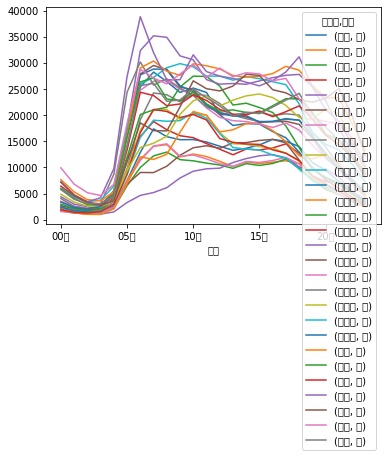

In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig_data.T.plot()
plt.xticks(fig_data.columns)

# App 1. DataFrame 조작

In [11]:
# Index 설정
df_ex.set_index (['날짜','영업소','자료종류'])

00시   01시   02시  03시   04시   05시   06시   07시   08시  \
날짜         영업소 자료종류                                                        
2020.03.20 서울  입구    1455  1003   683  715  1015  3436  5861  6311  5952   
           동서울 입구     448   359   324  356   656  2016  3873  4623  4885   
           서서울 입구     810   582   463  542  1107  3757  6539  7370  6985   
           군자  입구     406   329   234  256   575  1674  2620  3733  3651   
2020.03.21 서울  입구    1975  1299  1043  893  1262  3152  5151  4861  4744   
...                   ...   ...   ...  ...   ...   ...   ...   ...   ...   
2020.04.19 서서울 입구    1098   796   611  561   798  2073  2862  2883  3112   
           군자  입구     530   379   278  212   318   697   958  1054  1247   
2020.04.20 서울  입구    1435   936   686  831  2003  5742  7951  6157  5315   
           동서울 입구     461   344   301  495  1198  3515  5215  5898  5268   
           군자  입구     396   300   272  337   924  2492  3405  3718  3520   

                      09시  ...   14시   15시   16시   17시   18시   19시   20시  \
날짜         영업소 자료종류        ...                                             
2020.03.20 서울  입구    5599  ...  5133  5278  5476  5772  6091  4922  4644   
           동서울 입구    4772  ...  3907  4287  3992  3679  4060  3266  2793   
           서서울 입구    6251  ...  5549  5264  5550  5274  5352  5039  4331   
           군자  입구    3136  ...  2866  2912  3017  2934  2845  2260  1856   
2020.03.21 서울  입구    5359  ...  5461  5771  5428  5401  4414  3801  3694   
...                   ...  ...   ...   ...   ...   ...   ...   ...   ...   
2020.04.19 서서울 입구    3815  ...  4574  4568  4574  4324  3810  3679  4114   
           군자  입구    1614  ...  2355  2646  2723  2260  1965  1737  1667   
2020.04.20 서울  입구    5130  ...  5298  4951  5062  5719  6206  4923  4571   
           동서울 입구    5134  ...  3707  3721  3549  3019  2567  1884  1592   
           군자  입구    3084  ...  2760  2720  2832  2866  2511  1938  1494   

                      21시   22시   23시  
날짜         영업소 자료종류                    
2020.03.20 서울  입구    4647  3621  2562  
           동서울 입구    2040  1355   854  
           서서울 입구    3377  2378  1582  
           군자  입구    1451  1059   765  
2020.03.21 서울  입구    3471  3095  1964  
...                   ...   ...   ...  
2020.04.19 서서울 입구    3944  2823  1764  
           군자  입구    1522  1008   632  
2020.04.20 서울  입구    3844  2890  2164  
           동서울 입구    1356   970   681  
           군자  입구    1196   919   572  

[127 rows x 24 columns]

In [12]:
# Index 초기화
df_ex.reindex()

,날짜,영업소,자료종류,00시,01시,02시,03시,04시,05시,06시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,2020.03.20,서울,입구,1455,1003,683,715,1015,3436,5861,...,5133,5278,5476,5772,6091,4922,4644,4647,3621,2562
1,2020.03.20,동서울,입구,448,359,324,356,656,2016,3873,...,3907,4287,3992,3679,4060,3266,2793,2040,1355,854
2,2020.03.20,서서울,입구,810,582,463,542,1107,3757,6539,...,5549,5264,5550,5274,5352,5039,4331,3377,2378,1582
3,2020.03.20,군자,입구,406,329,234,256,575,1674,2620,...,2866,2912,3017,2934,2845,2260,1856,1451,1059,765
4,2020.03.21,서울,입구,1975,1299,1043,893,1262,3152,5151,...,5461,5771,5428,5401,4414,3801,3694,3471,3095,1964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,2020.04.19,서서울,입구,1098,796,611,561,798,2073,2862,...,4574,4568,4574,4324,3810,3679,4114,3944,2823,1764
123,2020.04.19,군자,입구,530,379,278,212,318,697,958,...,2355,2646,2723,2260,1965,1737,1667,1522,1008,632
124,2020.04.20,서울,입구,1435,936,686,831,2003,5742,7951,...,5298,4951,5062,5719,6206,4923,4571,3844,2890,2164
125,2020.04.20,동서울,입구,461,344,301,495,1198,3515,5215,...,3707,3721,3549,3019,2567,1884,1592,1356,970,681
